In [11]:
import sys 
import os 
from ultralytics import YOLO
import cv2

sys.path.insert(0, '../src')
from dataset import VQADataset

In [6]:
class Config:
    base_dir = os.path.dirname(os.getcwd())
    data_dir = os.path.join(base_dir, 'dataset')
    image_dir = os.path.join(data_dir, 'images')
    train_file = 'data_train.csv'
    eval_file = 'data_eval.csv'

cfg = Config()

In [32]:
class Detector:
    def __init__(self, model_name):
        self.model = YOLO(model_name)
        print("Model Loaded")

    def detect(self, data, display=True):
        print(f"Question : {data['question']}")
        print(f"Answer : {data['answer']}")

        image_path = data['image_path']
        im2 = cv2.imread(image_path)
        results = self.model.predict(source=im2)

        if display:
            results[0].show()

        return results

In [33]:
vqa_dataset = VQADataset(cfg=cfg, type_='train')
detector = Detector(model_name='yolov8n.pt')

Dataset Size : 9974
Model Loaded


Question : what is on the television
Answer : dvd_player

0: 512x640 1 refrigerator, 70.5ms
Speed: 5.2ms preprocess, 70.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


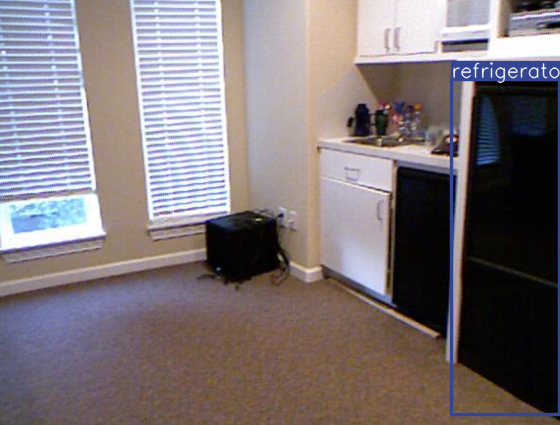

In [34]:
data = vqa_dataset.fetch_data(idx=105)
res = detector.detect(data)

Question : what is tilt on the chair
Answer : guitar

0: 512x640 2 chairs, 64.4ms
Speed: 4.5ms preprocess, 64.4ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


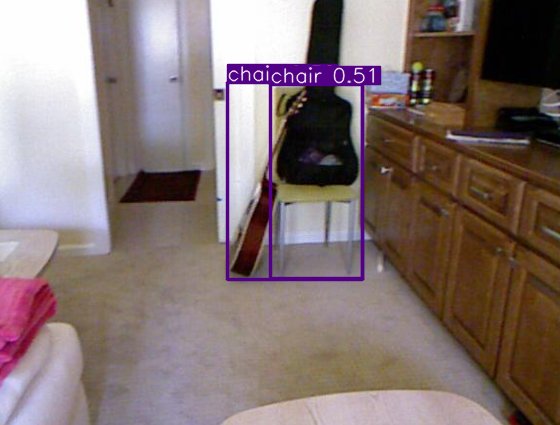

In [36]:
data = vqa_dataset.fetch_data(idx=1001)
res = detector.detect(data)

Question : what is to the left of the printer
Answer : paper_tray

0: 512x640 3 cups, 2 chairs, 1 tv, 1 book, 80.5ms
Speed: 5.2ms preprocess, 80.5ms inference, 1.8ms postprocess per image at shape (1, 3, 512, 640)


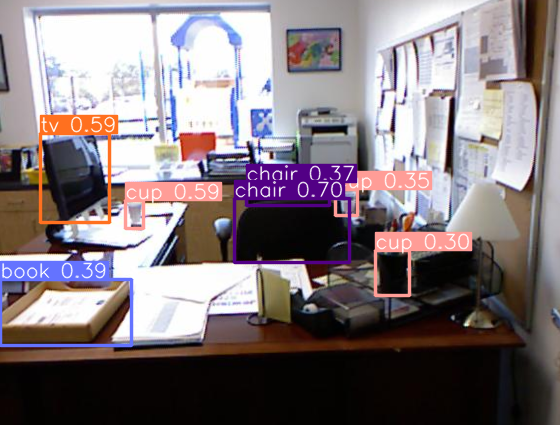

In [37]:
data = vqa_dataset.fetch_data(idx=5000)
res = detector.detect(data)

Question : what is the object close to the wall above the stove burner
Answer : microwave

0: 512x640 1 knife, 1 bowl, 1 tv, 1 microwave, 1 oven, 87.4ms
Speed: 7.8ms preprocess, 87.4ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)


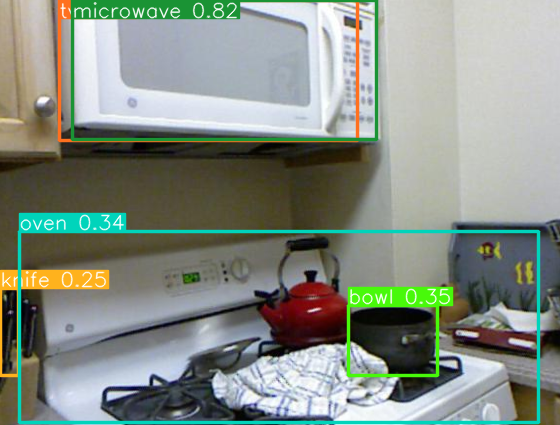

In [38]:
data = vqa_dataset.fetch_data(idx=6001)
res = detector.detect(data)